In [4]:
%load_ext autoreload
%autoreload 2

In [6]:
import math

import numpy as np
import matplotlib.pyplot as plt

from anguilla.optimizers.mocma import MOCMA, MOStoppingConditions, SuccessNotion
import anguilla.fitness.benchmark as benchmark

In [10]:
def population_plot(get_fn, n_parents=10, n_offspring=None,
                    n_trials=5, max_generations=None, max_evaluations=None,
                    success_notion=SuccessNotion.IndividualBased,
                    rng=None, initial_step_size=1.0,
                    region_bounds=None, yscale='linear', xscale='linear',
                    plot_initial_fronts=True, plot_true_front=True, short_title=False):
    if n_offspring is None:
        n_offspring = n_parents
    # 1) Initialize storage
    initial = np.zeros((n_trials, n_parents, 2))
    final = np.zeros((n_trials, n_parents, 2))

    stopping_conditions = MOStoppingConditions(max_generations=max_generations, max_evaluations=max_evaluations)
    # 2) Run the trials
    for trial in range(n_trials):
        fn = get_fn(rng)
        fn.n_objectives = 2
        if fn.n_objectives != 2:
            raise ValueError("The provided function does not support 2 objectives")
        parent_points = fn.random_points(n_parents, region_bounds=region_bounds)
        parent_fitness = fn(parent_points)
        optimizer = MOCMA(parent_points, parent_fitness, n_offspring=n_offspring,
                          rng=rng, success_notion=success_notion, stopping_conditions=stopping_conditions)
        initial[trial, :, :] = optimizer.best.fitness
        while not optimizer.stop.triggered:
            points = optimizer.ask()
            if fn.has_constraints:
                fitness, penalized_fitness = fn.evaluate_with_penalty(points)
                optimizer.tell(fitness, penalized_fitness)
            else:
                optimizer.tell(fn(points))
        final[trial, :, :] = optimizer.best.fitness

    # 3) Plot the results
    if plot_initial_fronts:
        fig = plt.figure(figsize=(8, 4))
        ax0, ax1 = fig.subplots(1, 2)
    else:
        fig = plt.figure(figsize=(4,4))
        ax1, ax0 = fig.subplots(1, 1), None
    if plot_true_front:
        # 3.1) Plot the true Pareto front for reference
        # Note: Not all benchmark functions implement 
        # the Pareto front function, hence the try/catch block
        try:
            front = fn.pareto_front()
            if plot_initial_fronts:
                ax0.plot(front[0], front[1], color='red', linestyle='-', label="True")
            ax1.plot(front[0], front[1], color='red', linestyle='-', label="True")
        except NotImplementedError:
            pass
    # 3.2) Plot the fronts obtained at the start and end of every trial
    for trial in range(n_trials):
        color, label = None, False
        for i in range(n_parents):
            if plot_initial_fronts:
                if color is None:
                    p = ax0.plot(initial[trial, i, 0], initial[trial, i, 1], marker='x')
                    color, label = p[0].get_color(), False
                else:
                    ax0.plot(initial[trial, i, 0], initial[trial, i, 1], marker='x', color=color, alpha=0.5)
            if color is None:
                p = ax1.plot(final[trial, i, 0], final[trial, i, 1], marker='x', color=color, alpha=0.5,
                           label=f"Trial {trial+1}")
                color, label = p[0].get_color(), True
            else:
                p = ax1.plot(final[trial, i, 0], final[trial, i, 1], marker='x', color=color, alpha=0.5,
                           label=f"Trial {trial+1}" if not label else None)
                label = True
    if not short_title:
        fig.suptitle("""Population plot for {}: $\mathbb{{R}}^{{{}}} \mapsto \mathbb{{R}}^{}$ using {}\n \
        for {} generations / {} evaluations in {} trials""".format(
            fn.qualified_name, fn.n_dimensions, fn.n_objectives, optimizer.qualified_name,
            optimizer.generation_count, optimizer.evaluation_count, n_trials,)
        )
    else:
        fig.suptitle("{} - {} evaluations".format(fn.name, fn.evaluation_count))
    if plot_initial_fronts:
        ax0.set_ylabel('Second objective')
        ax0.set_xlabel('First objective')
        ax0.set_title('Initial front (random points)')
        ax0.set_xscale(xscale)
        ax0.set_yscale(yscale)
    ax1.set_title('Final front')
    ax1.set_xscale(xscale)
    ax1.set_yscale(yscale)
    ax1.legend()
    fig.tight_layout()

    return fig

## ZDT benchmark

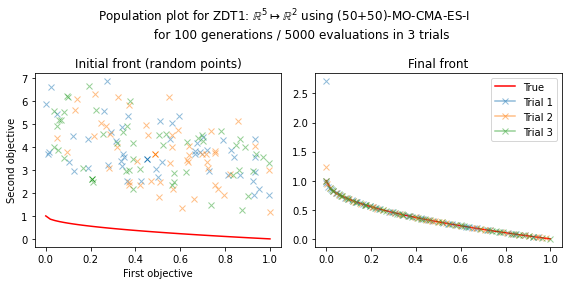

In [4]:
fig = population_plot(lambda rng: benchmark.ZDT1(5, rng=rng), n_trials=3, n_parents=50, max_generations=100)

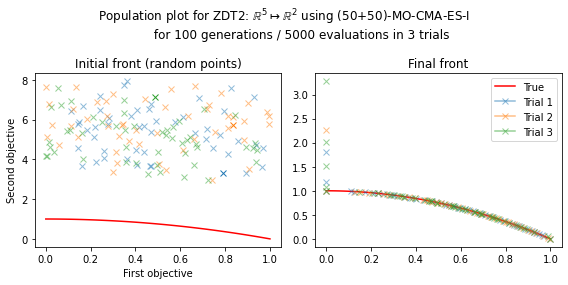

In [5]:
fig = population_plot(lambda rng: benchmark.ZDT2(5, rng=rng), n_trials=3, n_parents=50, max_generations=100)

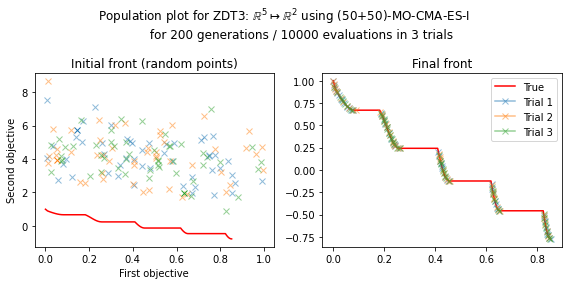

In [6]:
fig = population_plot(lambda rng: benchmark.ZDT3(5, rng=rng), n_trials=3, n_parents=50, max_generations=200)

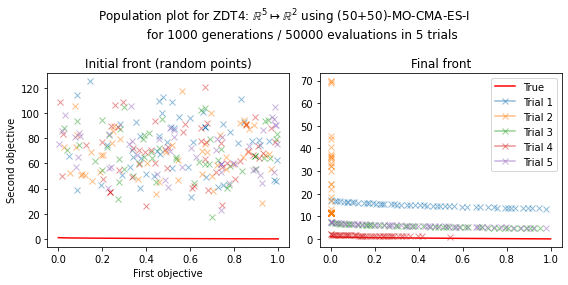

In [7]:
fig = population_plot(lambda rng: benchmark.ZDT4(5, rng=rng), n_trials=5, n_parents=50, max_generations=1000)

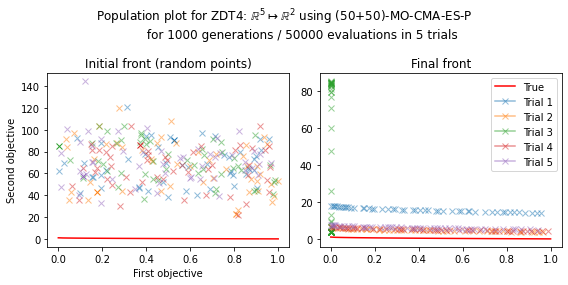

In [8]:
fig = population_plot(lambda rng: benchmark.ZDT4(5, rng=rng), n_trials=5, n_parents=50, max_generations=1000,
                      success_notion=SuccessNotion.PopulationBased)

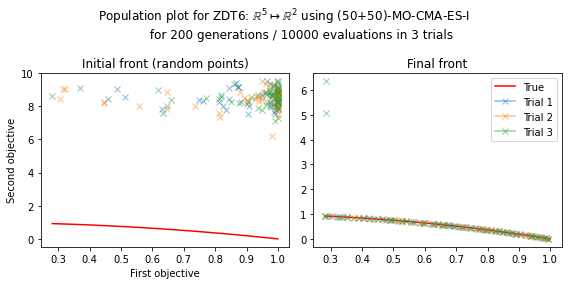

In [9]:
fig = population_plot(lambda rng: benchmark.ZDT6(5, rng=rng), n_trials=3, n_parents=50, max_generations=200)

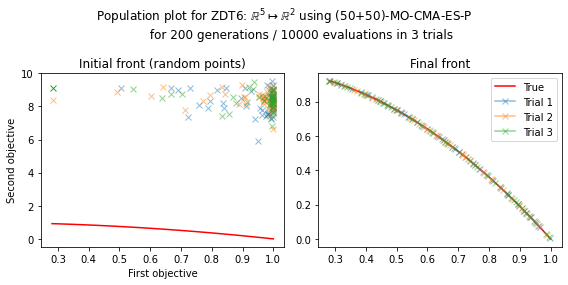

In [10]:
fig = population_plot(lambda rng: benchmark.ZDT6(5, rng=rng), n_trials=3, n_parents=50, max_generations=200,
                      success_notion=SuccessNotion.PopulationBased)

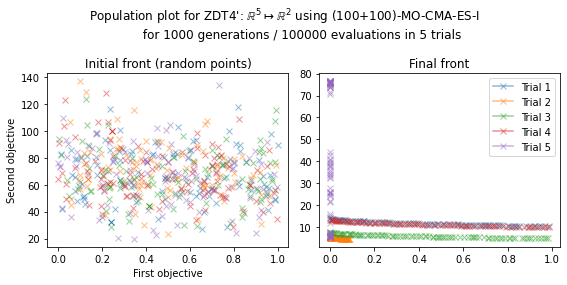

In [11]:
fig = population_plot(lambda rng: benchmark.ZDT4P(5, rng=rng), n_trials=5, n_parents=100, max_generations=1000)

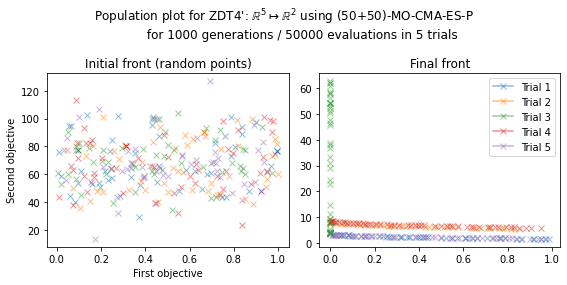

In [12]:
fig = population_plot(lambda rng: benchmark.ZDT4P(5, rng=rng), n_trials=5, n_parents=50, max_generations=1000,
                      success_notion=SuccessNotion.PopulationBased)

## DTZL benchmark

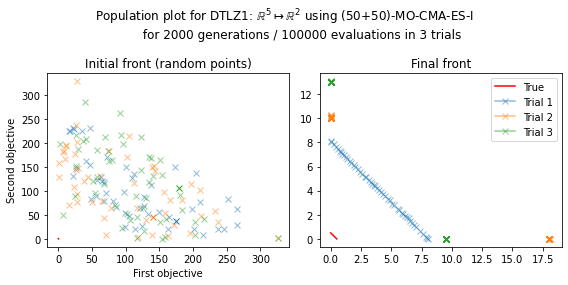

In [13]:
fig = population_plot(lambda rng: benchmark.DTLZ1(5, rng=rng), n_trials=3, n_parents=50, max_generations=2000)

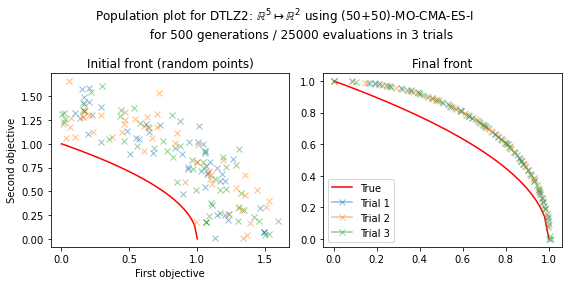

In [14]:
fig = population_plot(lambda rng: benchmark.DTLZ2(5, rng=rng), n_trials=3, n_parents=50, max_generations=500)

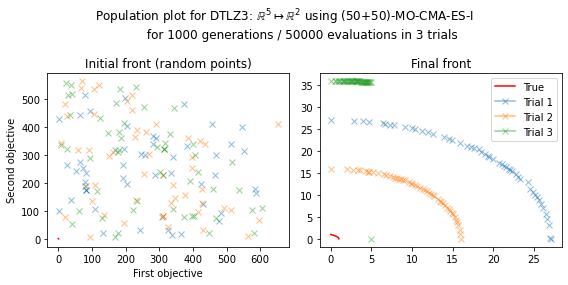

In [15]:
fig = population_plot(lambda rng: benchmark.DTLZ3(5, rng=rng), n_trials=3, n_parents=50, max_generations=1000)

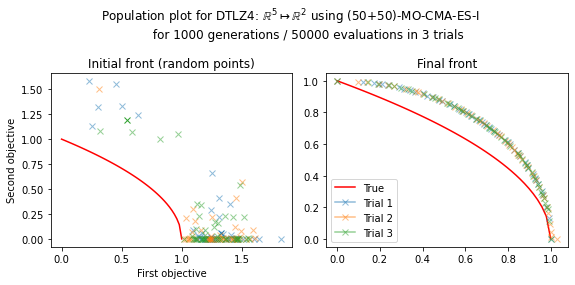

In [16]:
fig = population_plot(lambda rng: benchmark.DTLZ4(5, rng=rng), n_trials=3, n_parents=50, max_generations=1000)

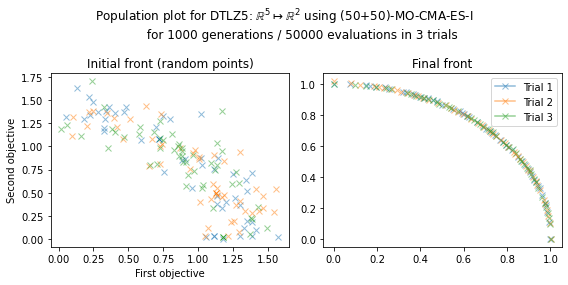

In [17]:
fig = population_plot(lambda rng: benchmark.DTLZ5(5, rng=rng), n_trials=3, n_parents=50, max_generations=1000)

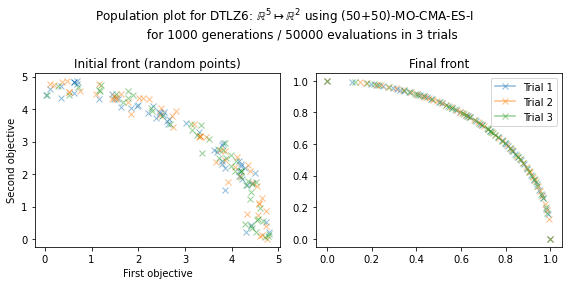

In [18]:
fig = population_plot(lambda rng: benchmark.DTLZ6(5, rng=rng), n_trials=3, n_parents=50, max_generations=1000)

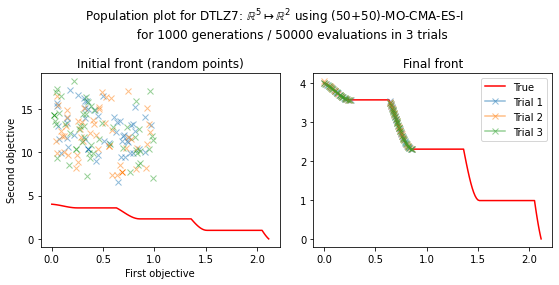

In [19]:
fig = population_plot(lambda rng: benchmark.DTLZ7(5, rng=rng), n_trials=3, n_parents=50, max_generations=1000)

## Other benchmark functions

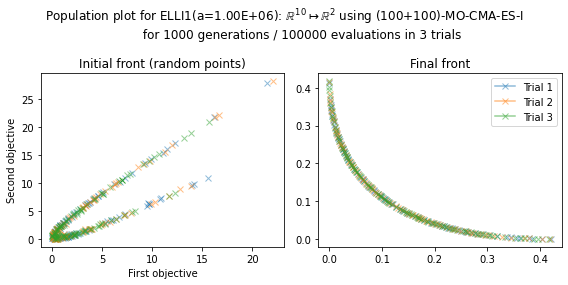

In [20]:
fig = population_plot(lambda rng: benchmark.ELLI1(10, rng=rng), n_trials=3, n_parents=100, max_generations=1000, region_bounds=(-10.0, 10.0))

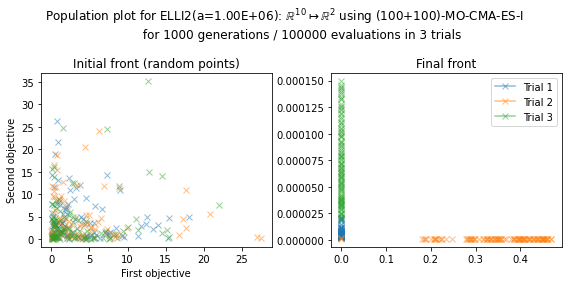

In [21]:
fig = population_plot(lambda rng: benchmark.ELLI2(10, rng=rng), n_trials=3, n_parents=100, max_generations=1000, region_bounds=(-10.0, 10.0))

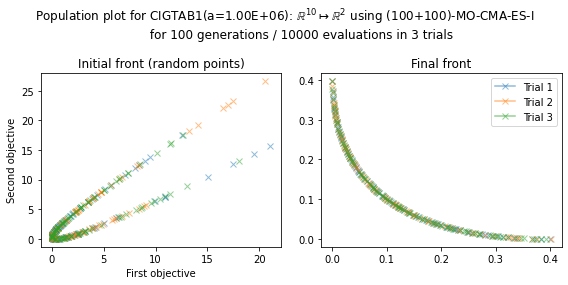

In [22]:
fig = population_plot(lambda rng: benchmark.CIGTAB1(10, rng=rng, a=1e6), n_trials=3, n_parents=100, max_generations=100, region_bounds=(-10.0, 10.0))

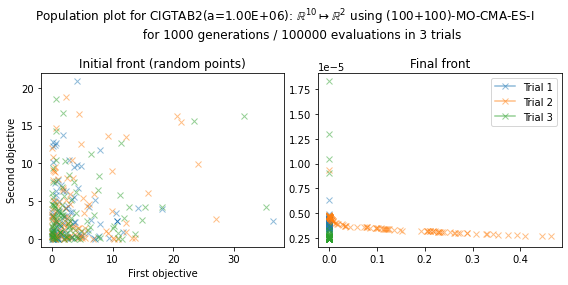

In [23]:
fig = population_plot(lambda rng: benchmark.CIGTAB2(10, rng=rng), n_trials=3, n_parents=100, max_generations=1000, region_bounds=(-10.0, 10.0))

## Example of a simple plot

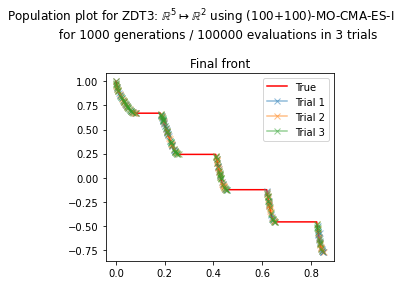

In [22]:
fig = population_plot(lambda rng: benchmark.ZDT3(5, rng=rng), n_trials=3, n_parents=100,
                      max_generations=None, max_evaluations=100000,
                      plot_initial_fronts=False, short_title=False,)

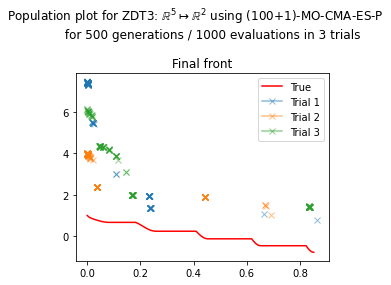

In [11]:
fig = population_plot(lambda rng: benchmark.ZDT3(5, rng=rng), n_trials=3, n_parents=100, n_offspring=1,
                      max_evaluations=1000, max_generations=None, plot_initial_fronts=False, short_title=False,
                     success_notion=SuccessNotion.PopulationBased)

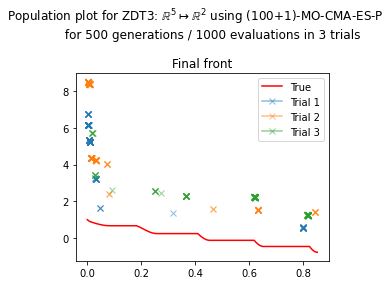

In [13]:
fig = population_plot(lambda rng: benchmark.ZDT3(5, rng=rng), n_trials=3, n_parents=100, n_offspring=1,
                      max_evaluations=1000, max_generations=None, plot_initial_fronts=False, short_title=False,
                     success_notion=SuccessNotion.PopulationBased)